In [106]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("suicidenew.csv")

In [107]:
df.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [108]:
df=df[["gender","sexuallity","age","bodyweight","friends","social_fear","depressed","attempt_suicide","employment","edu_level"]]
df.head()

,gender,sexuallity,age,bodyweight,friends,social_fear,depressed,attempt_suicide,employment,edu_level
0,Male,Straight,35,Normal weight,0.0,Yes,Yes,Yes,Employed for wages,Associate degree
1,Male,Bisexual,21,Underweight,0.0,Yes,Yes,No,Out of work and looking for work,"Some college, no degree"
2,Male,Straight,22,Overweight,10.0,Yes,Yes,No,Out of work but not currently looking for work,"Some college, no degree"
3,Male,Straight,19,Overweight,8.0,Yes,Yes,No,A student,"Some college, no degree"
4,Male,Straight,23,Overweight,10.0,No,Yes,No,Employed for wages,"High school graduate, diploma or the equivalen..."


In [109]:
df["gender"].unique()

array(['Male', 'Female', 'Transgender male', 'Transgender female'],
      dtype=object)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           469 non-null    object 
 1   sexuallity       469 non-null    object 
 2   age              469 non-null    int64  
 3   bodyweight       469 non-null    object 
 4   friends          469 non-null    float64
 5   social_fear      469 non-null    object 
 6   depressed        469 non-null    object 
 7   attempt_suicide  469 non-null    object 
 8   employment       469 non-null    object 
 9   edu_level        469 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 36.8+ KB


In [111]:
df=df.dropna()
df.isnull().sum()

gender             0
sexuallity         0
age                0
bodyweight         0
friends            0
social_fear        0
depressed          0
attempt_suicide    0
employment         0
edu_level          0
dtype: int64

In [112]:
df['gender'].value_counts()

Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64

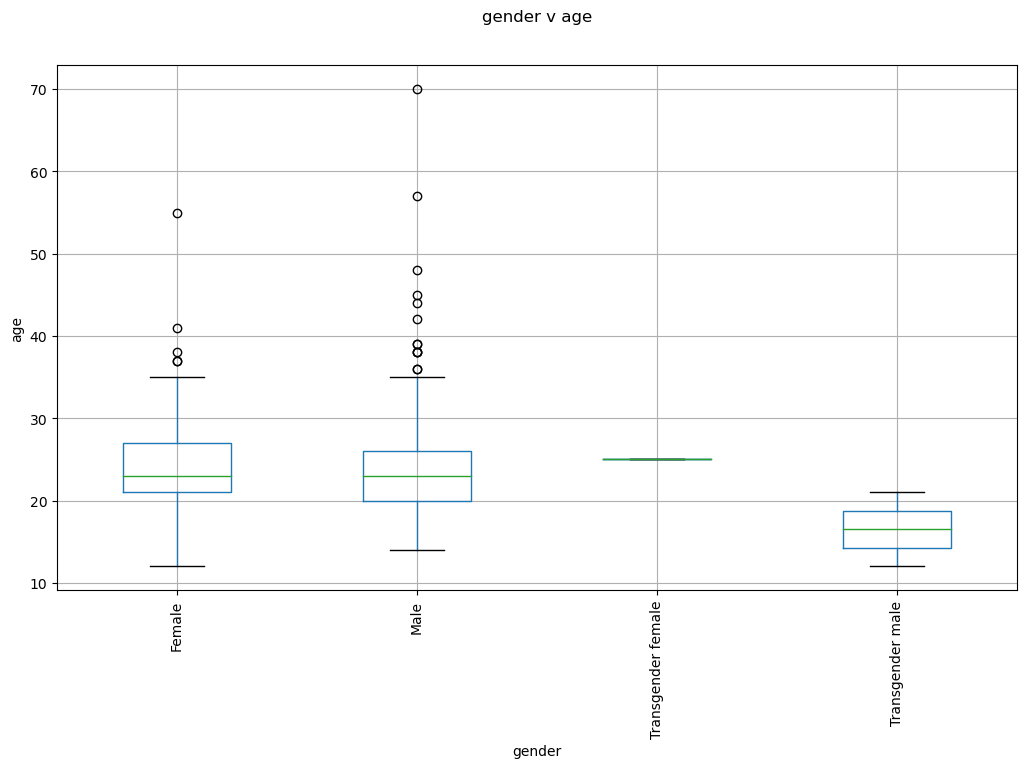

In [113]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('age','gender',ax=ax)
plt.suptitle('gender v age')
plt.title('')
plt.ylabel('age')
plt.xticks(rotation=90)
plt.show()

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le_bodyweight=LabelEncoder()
df['bodyweight']=le_bodyweight.fit_transform(df['bodyweight'])
df["bodyweight"].unique()

array([0, 3, 2, 1])

In [116]:
df["edu_level"].unique()

array(['Associate degree', 'Some college, no degree',
       'High school graduate, diploma or the equivalent (for example: GED)',
       'Bachelor’s degree', 'Trade/technical/vocational training',
       'Master’s degree', 'Some high school, no diploma',
       'Doctorate degree', 'Professional degree'], dtype=object)

In [117]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'High school graduate' in x:
        return 'High school graduate'
    return 'Not highly educated'
df['edu_level']=df['edu_level'].apply(clean_education) 

In [118]:
df["edu_level"].unique()

array(['Not highly educated', 'High school graduate', 'Bachelor’s degree',
       'Master’s degree'], dtype=object)

In [119]:
le_employment=LabelEncoder()
print(df["employment"].unique())
df['employment']=le_employment.fit_transform(df['employment'])
df["employment"].unique()

['Employed for wages' 'Out of work and looking for work'
 'Out of work but not currently looking for work' 'A student'
 'Unable to work' 'Retired' 'Military' 'Self-employed' 'A homemaker']


array([2, 4, 5, 1, 8, 6, 3, 7, 0])

In [120]:
le_gender=LabelEncoder()
print(df["gender"].unique())
df['gender']=le_gender.fit_transform(df['gender'])
df["gender"].unique()

['Male' 'Female' 'Transgender male' 'Transgender female']


array([1, 0, 3, 2])

In [121]:
from sklearn.preprocessing import LabelEncoder
le_suicide=LabelEncoder()
df['attempt_suicide']=le_suicide.fit_transform(df['attempt_suicide'])
df["attempt_suicide"].unique()

array([1, 0])

In [122]:
le_fear=LabelEncoder()
df['social_fear']=le_fear.fit_transform(df['social_fear'])
df["social_fear"].unique()

array([1, 0])

In [123]:
le_depressed=LabelEncoder()
df['depressed']=le_depressed.fit_transform(df['depressed'])
df["depressed"].unique()

array([1, 0])

In [124]:
le_education=LabelEncoder()
df['edu_level']=le_education.fit_transform(df['edu_level'])
df["edu_level"].unique()

array([3, 1, 0, 2])

In [125]:
df["employment"].unique()

array([2, 4, 5, 1, 8, 6, 3, 7, 0])

In [126]:
le_sexuality=LabelEncoder()
df['sexuallity']=le_sexuality.fit_transform(df['sexuallity'])
df["sexuallity"].unique()

array([2, 0, 1])

In [127]:
x=df.drop("attempt_suicide",axis=1)
y=df["attempt_suicide"]

In [128]:
le_gender.transform(["Female"])

array([0])

In [129]:
x

,gender,sexuallity,age,bodyweight,friends,social_fear,depressed,employment,edu_level
0,1,2,35,0,0.0,1,1,2,3
1,1,0,21,3,0.0,1,1,4,3
2,1,2,22,2,10.0,1,1,5,3
3,1,2,19,2,8.0,1,1,1,3
4,1,2,23,2,10.0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
464,0,2,26,2,10.0,1,0,2,2
465,1,2,31,0,10.0,0,0,2,1
466,0,2,17,0,20.0,1,1,2,3
467,1,2,18,1,16.0,1,1,5,1


In [130]:
y.values

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [131]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [132]:
y_pred=linear_reg.predict(x)

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error= np.sqrt(mean_squared_error(y,y_pred))

In [134]:
error

0.36507972087135193

In [135]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [136]:
y_pred=dec_tree_reg.predict(x)

In [137]:
error=np.sqrt(mean_squared_error(y,y_pred))
print(format(error))

0.03265115742241696


In [138]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [139]:
y_pred=random_forest_reg.predict(x)

In [140]:
error=np.sqrt(mean_squared_error(y,y_pred))
print(format(error))

0.15055228534929993


In [141]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [142]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print(format(error))

0.36743676484881704


In [143]:
x

,gender,sexuallity,age,bodyweight,friends,social_fear,depressed,employment,edu_level
0,1,2,35,0,0.0,1,1,2,3
1,1,0,21,3,0.0,1,1,4,3
2,1,2,22,2,10.0,1,1,5,3
3,1,2,19,2,8.0,1,1,1,3
4,1,2,23,2,10.0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
464,0,2,26,2,10.0,1,0,2,2
465,1,2,31,0,10.0,0,0,2,1
466,0,2,17,0,20.0,1,1,2,3
467,1,2,18,1,16.0,1,1,5,1


In [144]:
x

,gender,sexuallity,age,bodyweight,friends,social_fear,depressed,employment,edu_level
0,1,2,35,0,0.0,1,1,2,3
1,1,0,21,3,0.0,1,1,4,3
2,1,2,22,2,10.0,1,1,5,3
3,1,2,19,2,8.0,1,1,1,3
4,1,2,23,2,10.0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
464,0,2,26,2,10.0,1,0,2,2
465,1,2,31,0,10.0,0,0,2,1
466,0,2,17,0,20.0,1,1,2,3
467,1,2,18,1,16.0,1,1,5,1


In [145]:
x = np.array([["Male", 'Straight',22,'Overweight',10.0,'Yes','No','Out of work and looking for work','High school graduate'  ]])
x

array([['Male', 'Straight', '22', 'Overweight', '10.0', 'Yes', 'No',
        'Out of work and looking for work', 'High school graduate']],
      dtype='<U32')

In [146]:
x

array([['Male', 'Straight', '22', 'Overweight', '10.0', 'Yes', 'No',
        'Out of work and looking for work', 'High school graduate']],
      dtype='<U32')

In [147]:
x[:, 0] = le_gender.transform(x[:,0])
x[:, 1] = le_sexuality.transform(x[:,1])
x[:, 3] = le_bodyweight.transform(x[:,3])
x[:, 5] = le_fear.transform(x[:,5])
x[:, 6] = le_depressed.transform(x[:,6])
x[:, 7] = le_employment.transform(x[:,7])
x[:, 8] = le_education.transform(x[:,8])
x = x.astype(float)
x

array([[ 1.,  2., 22.,  2., 10.,  1.,  0.,  4.,  1.]])

In [148]:
# [le_gender,le_sexuality,le_age,le_bodyweight,le_friends,le_fear,le_depressed,le_employment,le_education]

In [149]:
y_pred = regressor.predict(x)
y_pred

C:\J\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.05769231])

In [150]:
import pickle

In [151]:
# data = {"model": regressor, "le_gender": le_gender, "le_sexuality": le_sexuality, "le_age": le_age, "le_bodyweight": le_bodyweight, "le_friends":le_friends, "le_fear":le_fear,"le_depressed":le_depressed,"le_employment":le_employment,"le_education":le_education}
# with open('saved_steps.pkl', 'wb') as file:
#     pickle.dump(data, file)

In [152]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    print(data)

regressor_loaded = data["model"]
le_gender=data["le_gender"]
le_sexuality=data["le_sexuality"]
le_age=data["le_age"]
le_bodyweight=data["le_bodyweight"]
le_friends=data["le_friends"]
le_fear=data["le_fear"]
le_depressed=data["le_depressed"]
le_employment=data["le_employment"]
le_education=data["le_education"]

{'model': DecisionTreeRegressor(max_depth=2, random_state=0), 'le_gender': LabelEncoder(), 'le_sexuality': LabelEncoder(), 'le_age': LabelEncoder(), 'le_bodyweight': LabelEncoder(), 'le_friends': LabelEncoder(), 'le_fear': LabelEncoder(), 'le_depressed': LabelEncoder(), 'le_employment': LabelEncoder(), 'le_education': LabelEncoder()}


In [153]:
le_gender.transform(["Female"])

array([0])

In [154]:
le_bodyweight.classes_

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [155]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\J\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.05769231])

In [156]:
x

array([[ 1.,  2., 22.,  2., 10.,  1.,  0.,  4.,  1.]])